In [100]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [107]:
data = pd.read_csv("C:/Users/Ilsaf/Desktop/day.csv").drop(["instant", "dteday", "registered"], axis=1)

In [108]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1600


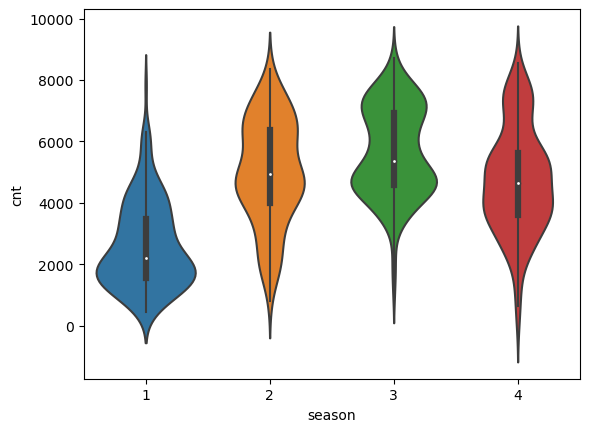

In [109]:
sns.violinplot(x=data["season"], y=data["cnt"]);

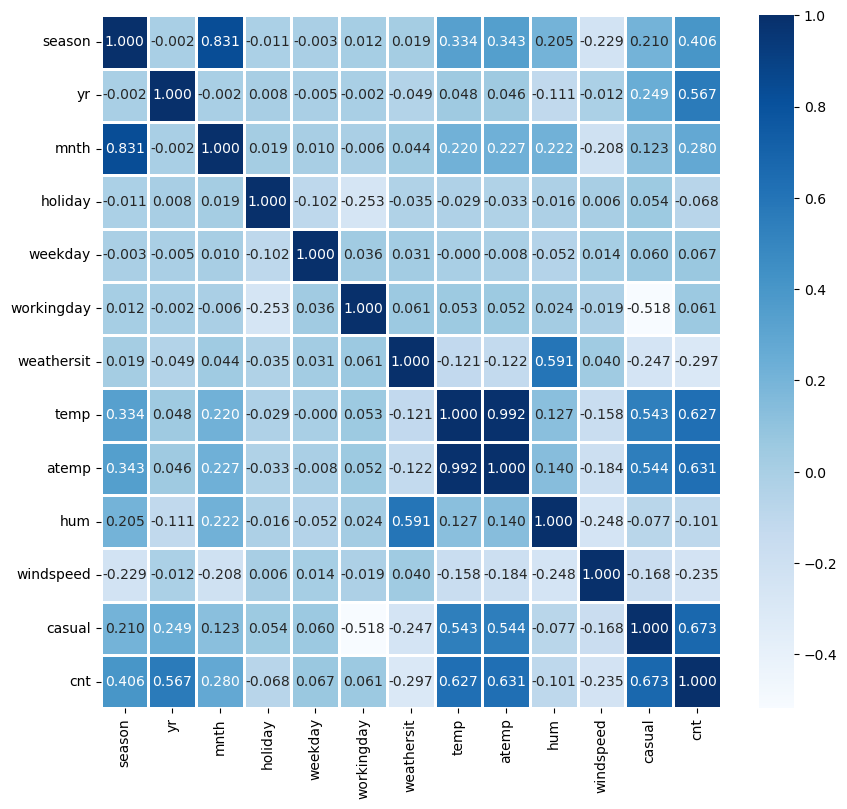

In [110]:
plt.figure(figsize=(10, 9))
sns.heatmap(data.corr(), cmap="Blues", fmt=".3f", annot=True, linewidths=1);

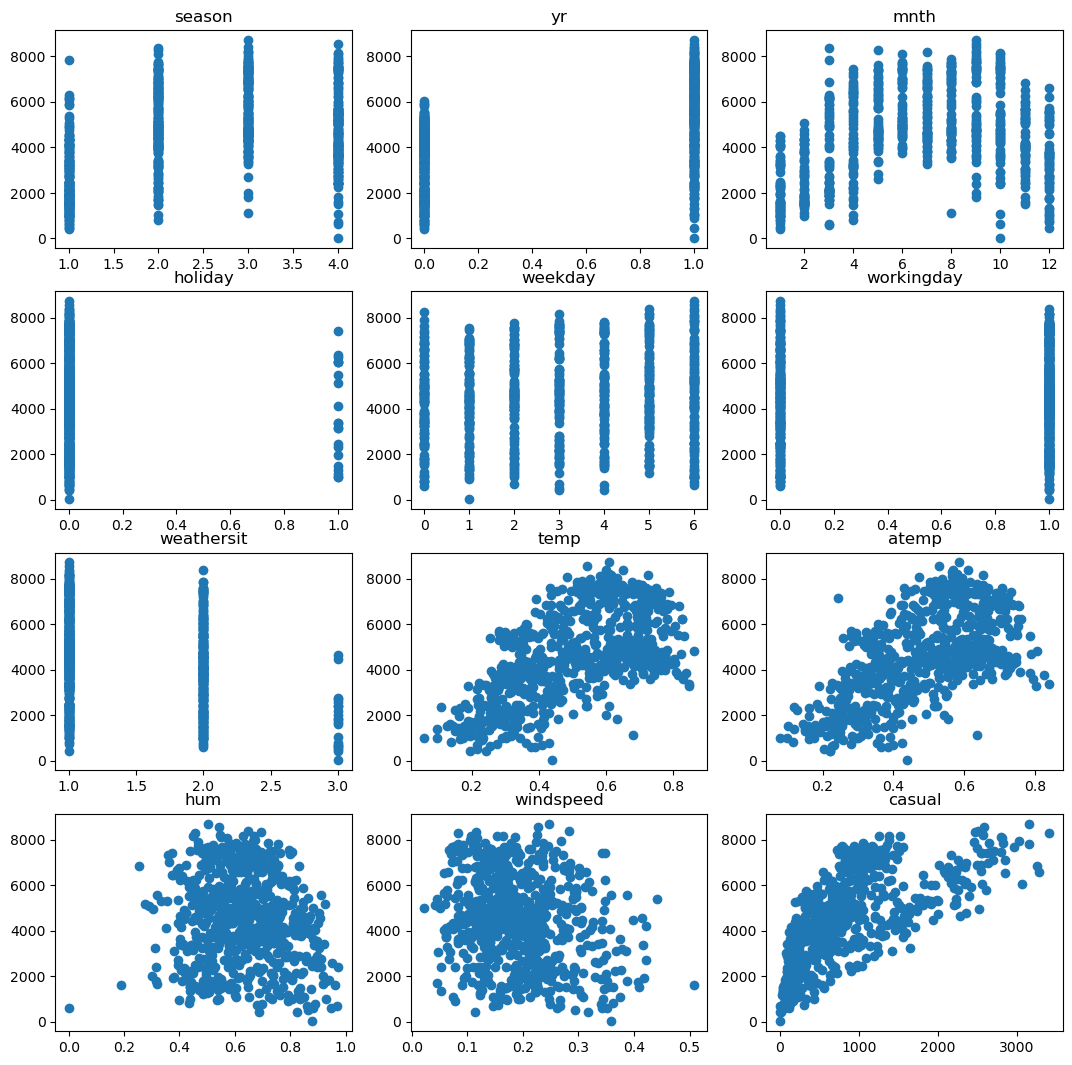

In [111]:
f, axs = plt.subplots(4, 3, figsize=(13, 13))
for i, column in enumerate(data.columns[:-1]):
    axs[i//3, i%3].set_title(column)
    axs[i//3, i%3].scatter(data[column], data["cnt"])

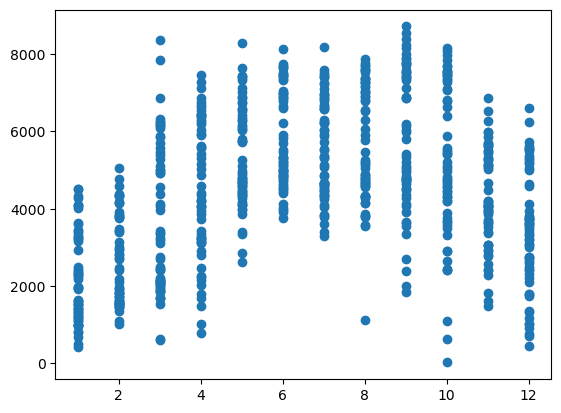

In [112]:
plt.scatter(data["mnth"], data["cnt"]);

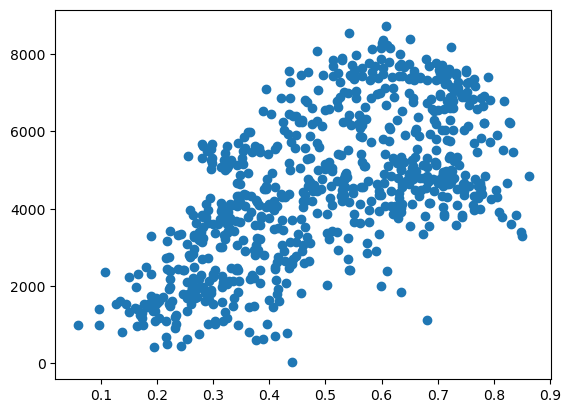

In [113]:
plt.scatter(data["temp"], data["cnt"]);

In [114]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [115]:
lr = LinearRegression()
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
ridgeCV = RidgeCV()
lassoCV = LassoCV(random_state=42)

In [116]:
X, y = data.drop("cnt", axis=1), data["cnt"]

In [117]:
index = int(0.7*len(X))

In [118]:
index

511

In [119]:
X_train, X_test = X.iloc[:index], X.iloc[index:].reset_index(drop=True)

In [120]:
y_train, y_test = y.iloc[:index], y.iloc[index:].reset_index(drop=True)

In [121]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [123]:
lr.score(X_test_scaled, y_test)

0.6874991728417572

In [124]:
np.sqrt(mean_squared_error(y_test, lr.predict(X_test_scaled)))

923.143273644647

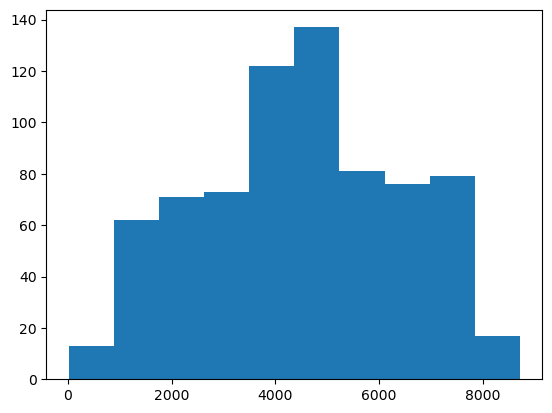

In [134]:
plt.hist(data["cnt"]);

In [136]:
pd.DataFrame({"column": data.columns[:-1], "coef": lr.coef_}).sort_values(by="coef", ascending=False)

,column,coef
11,casual,949.836775
1,yr,748.528209
5,workingday,538.861987
8,atemp,387.124780
0,season,276.169257
2,mnth,120.312675
4,weekday,48.612444
7,temp,21.283249
3,holiday,3.312168
9,hum,-58.084055


In [233]:
new_data = data.copy().drop("cnt", axis=1)

In [234]:
new_data["casual2"] = new_data["casual"] + np.random.randint(-10, 10, size=len(new_data)) / 200

In [235]:
new_data["cnt"] = data["cnt"]

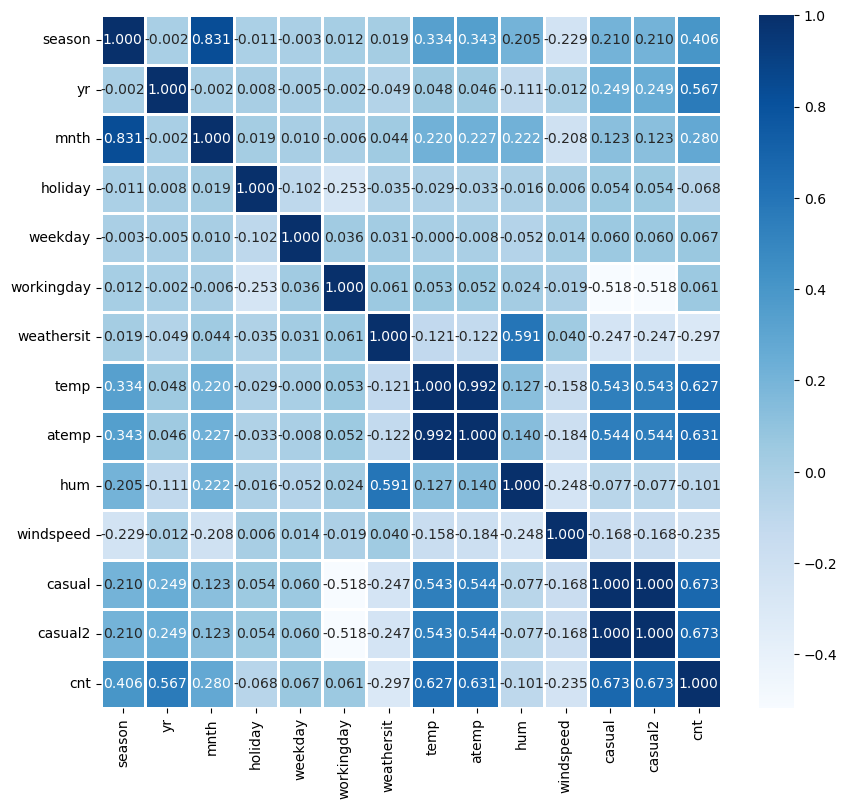

In [236]:
plt.figure(figsize=(10, 9))
sns.heatmap(new_data.corr(), cmap="Blues", fmt=".3f", annot=True, linewidths=1);

In [237]:
X, y = new_data.drop("cnt", axis=1), new_data["cnt"]
X_train, X_test = X.iloc[:index], X.iloc[index:].reset_index(drop=True)
y_train, y_test = y.iloc[:index], y.iloc[index:].reset_index(drop=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [238]:
X_train_scaled

array([[-1.1074006 , -0.63245553, -1.31527393, ..., -0.45775161,
        -0.6216816 , -0.62173285],
       [-1.1074006 , -0.63245553, -1.31527393, ...,  0.66603189,
        -0.94145542, -0.94149825],
       [-1.1074006 , -0.63245553, -1.31527393, ...,  0.66309783,
        -0.95904298, -0.95904582],
       ...,
       [-0.18426568,  1.58113883, -0.14537841, ..., -1.20333469,
         0.07382645,  0.07377427],
       [-0.18426568,  1.58113883, -0.14537841, ..., -0.29892963,
         0.54229509,  0.54229026],
       [-0.18426568,  1.58113883, -0.14537841, ..., -0.71156061,
         1.11469022,  1.11476457]])

In [239]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [240]:
lr.coef_

array([ 2.76742370e+02,  7.48667364e+02,  1.19533964e+02,  4.38300957e+00,
        4.76832422e+01,  5.39573115e+02, -2.14658259e+02,  1.12101966e+01,
        3.94862780e+02, -5.74408889e+01, -7.60684558e+01, -5.95191142e+05,
        5.96142311e+05])

In [241]:
pd.DataFrame({"column": new_data.columns[:-1], "coef": lr.coef_}).sort_values(by="coef", ascending=False)

,column,coef
12,casual2,596142.310726
1,yr,748.667364
5,workingday,539.573115
8,atemp,394.862780
0,season,276.742370
2,mnth,119.533964
4,weekday,47.683242
7,temp,11.210197
3,holiday,4.383010
9,hum,-57.440889


In [270]:
ridge = Ridge(random_state=42, alpha=10)

In [271]:
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=10, random_state=42)

In [272]:
np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_scaled)))

927.2188216863502

In [273]:
pd.DataFrame({"column": new_data.columns[:-1], "coef": ridge.coef_}).sort_values(by="coef", ascending=False)

,column,coef
1,yr,735.216737
5,workingday,515.997296
12,casual2,463.658030
11,casual,463.598530
0,season,263.742536
8,atemp,241.786668
7,temp,178.190371
2,mnth,121.379675
4,weekday,48.505983
3,holiday,-2.568402


In [287]:
lasso = Lasso(random_state=42, alpha=20)

In [288]:
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=20, random_state=42)

In [289]:
np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_scaled)))

927.2188216863502

In [290]:
pd.DataFrame({"column": new_data.columns[:-1], "coef": lasso.coef_}).sort_values(by="coef", ascending=False)

,column,coef
11,casual,929.557495
1,yr,716.572997
5,workingday,508.132109
8,atemp,407.121646
0,season,267.572825
2,mnth,93.217704
4,weekday,30.940522
12,casual2,0.294148
3,holiday,-0.000000
7,temp,0.000000


In [291]:
lassoCV = LassoCV(random_state=42)

In [292]:
lassoCV.fit(X_train_scaled, y_train)

LassoCV(random_state=42)

In [293]:
np.sqrt(mean_squared_error(y_test, lassoCV.predict(X_test_scaled)))

923.348806285358

In [299]:
pd.DataFrame({"column": new_data.columns[:-1], "coef": lassoCV.coef_}).sort_values(by="coef", ascending=False)

,column,coef
11,casual,947.805932
1,yr,746.962091
5,workingday,536.645723
8,atemp,377.841540
0,season,275.564140
2,mnth,119.049546
4,weekday,47.498483
7,temp,30.615948
3,holiday,1.542399
12,casual2,0.611474


In [301]:
ridgeCV = RidgeCV()
ridgeCV.fit(X_train_scaled, y_train)

RidgeCV()

In [302]:
np.sqrt(mean_squared_error(y_test, lassoCV.predict(X_test_scaled)))

923.348806285358

In [303]:
pd.DataFrame({"column": new_data.columns[:-1], "coef": ridgeCV.coef_}).sort_values(by="coef", ascending=False)

,column,coef
1,yr,735.216737
5,workingday,515.997296
12,casual2,463.658030
11,casual,463.598530
0,season,263.742536
8,atemp,241.786668
7,temp,178.190371
2,mnth,121.379675
4,weekday,48.505983
3,holiday,-2.568402
